In [15]:
df = pd.read_csv('data/SCFc.csv', parse_dates=['Trade Date'], dayfirst=True)
columns={'Trade Date':'Date', 'Universal Close Price':'Close'};
df = df.rename(columns=columns)
df = df[['RIC', 'Date', 'Close', 'Volume']]
for i in range(10):
    df.loc[df.RIC=='SCFc%s'%i,'RIC'] = 'SCFc0%s'%i
print('Done')


Done


In [31]:
columns=['Date']+['SCFc0%s'%i for i in range(1,10)]+['SCFc%s'%i for i in range(10,13)]
px = pd.DataFrame(columns=columns); volume = pd.DataFrame(columns=columns + ['Total'])

for i, (n,g) in enumerate(df.groupby(df.Date)):
    total_v = g.Volume.sum()
    v = g.set_index('RIC').T
    v['Date'] = n
    px.append(v.loc['Close'])
    v['Total'] = total_v
    volume = volume.append(v.loc['Volume'])
px.set_index('Date', inplace=True)
print('Done')

Done


In [12]:
mxs = pd.DataFrame()

for c in mx.columns:
    mxs[c] = mx[c]/mx['SCFc01']-1
mxs.head()

,SCFc01,SCFc02,SCFc03,SCFc04,SCFc05,SCFc06,SCFc07,SCFc08,SCFc09,SCFc10,SCFc11,SCFc12
Date,,,,,,,,,,,,
1999-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-08-02,0.0,0.006333,0.013933,0.021533,0.029766,0.036099,0.040532,0.013300,NaN,NaN,NaN,NaN
1999-08-03,0.0,0.006357,0.013032,0.019833,0.027144,0.034454,0.044689,NaN,NaN,NaN,NaN,NaN
1999-08-04,0.0,0.006980,0.013959,0.020939,0.029822,0.036168,0.040609,0.015228,NaN,NaN,NaN,NaN
1999-08-05,0.0,0.008822,0.017013,0.024575,0.033396,0.041588,0.046629,NaN,NaN,NaN,NaN,NaN


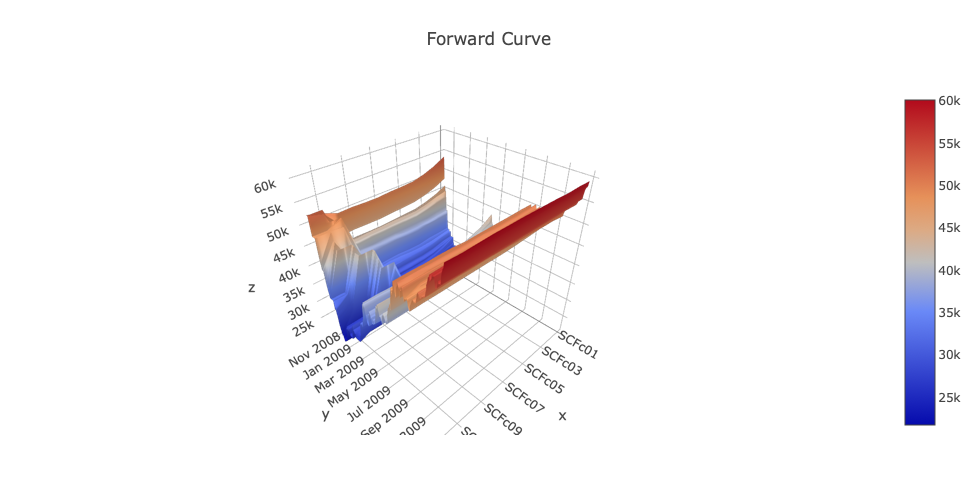

In [9]:
#mx = mxs[mxs.index>'2008-1-1']
m = mx['2008-10':'2009']
data = [
    go.Surface(
        x=m.columns,
        y=m.index.values.astype(str),
        z=m.values
    )
]
layout = go.Layout(
    title='Forward Curve',
    autosize=False,
    width=800,
    height=500,
    margin=dict(
        l=10,
        r=50,
        b=65,
        t=90
    ),    
    yaxis = {
        'tickformat': '%y/%m'
    },
    showlegend=False,
)
iplot(go.Figure(data=data, layout=layout))
